In [ ]:
import yfinance as yf

# Download Reliance data from Yahoo Finance
reliance_data = yf.download('RELIANCE.NS', start='2020-01-01', end='2024-09-30')

# Save to CSV
reliance_data.to_csv('RELIANCE.NS_Historical_Data.csv')


[*********************100%***********************]  1 of 1 completed


In [ ]:
!pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 68.3 MB/s eta 0:00:00


In [ ]:
from google.colab import files
data = files.upload()

Saving RELIANCE.NS_Historical_Data.xlsx to RELIANCE.NS_Historical_Data (1).xlsx


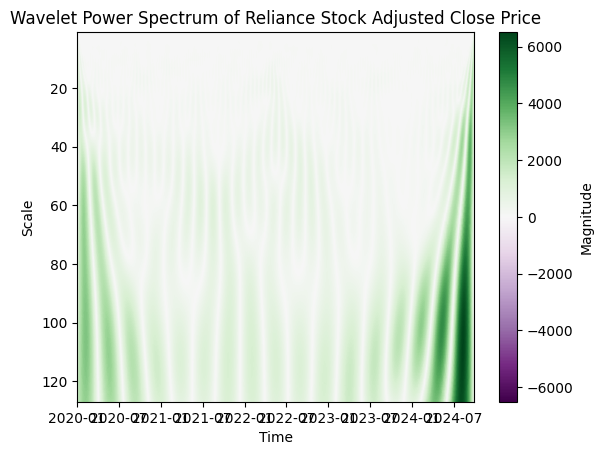

In [ ]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('RELIANCE.NS_Historical_Data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Select the Adjusted Close price for analysis
signal = data['Adj Close']

# Define the wavelet function and perform Continuous Wavelet Transform
scales = np.arange(1, 128)
cwtmatr, freqs = pywt.cwt(signal, scales, 'morl')

# Plotting the wavelet power spectrum
plt.imshow(np.abs(cwtmatr), extent=[signal.index[0], signal.index[-1], scales[-1], scales[0]], cmap='PRGn', aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.colorbar(label='Magnitude')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.title('Wavelet Power Spectrum of Reliance Stock Adjusted Close Price')
plt.show()


In [ ]:
import pywt

signal = data['Adj Close'].values
coeffs = pywt.wavedec(signal, 'db1', level=4)  # 'db1' can be replaced with other families
approx = coeffs[0]  # Long-term trend
details = coeffs[1:]  # Short-term fluctuations


In [ ]:
from scipy.stats import zscore

z_scores = zscore(data['Adj Close'].pct_change().dropna())
anomalies = data.iloc[np.where(np.abs(z_scores) > 3)]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your data
# Assuming 'data' is your DataFrame and it contains a column 'Adj Close'
data = pd.read_csv('RELIANCE.NS_Historical_Data.csv', usecols=['Adj Close'], parse_dates=True)
values = data['Adj Close'].values.reshape(-1,1)

# Normalize features to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(values)

# Specify the number of lag days
n_days = 60  # Number of days you want to use to predict the next day

# Prepare the training data
X, y = [], []
for i in range(n_days, len(scaled_data)):
    X.append(scaled_data[i-n_days:i, 0])  # Contains 60 previous days' closing prices
    y.append(scaled_data[i, 0])           # Contains the next day's closing price

# Convert the X and y to numpy arrays
X, y = np.array(X), np.array(y)

# Reshape X to be the shape (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Display the shapes of X and y for confirmation
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (1115, 60, 1)
Shape of y: (1115,)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Prepare your data (X) and labels (y) here for training

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X, y, epochs=100, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.1165
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0032
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0014
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 9.9108e-04
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 9.7363e-04
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 9.2736e-04
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 9.5186e-04
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 8.5226e-04
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 8.9567e-04
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 8.9711e-04
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 9.1015e-04
Epoch 12/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 8.0912e-04
Epoch 13/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 8.3547e-04
Epoch 14/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 8.2040e-04
Epoch 15/100


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


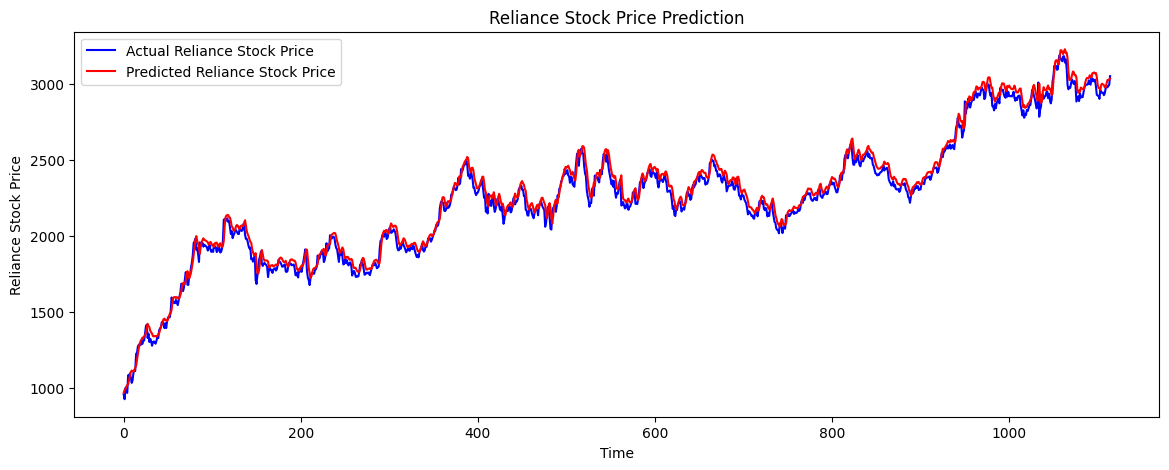

In [ ]:
# Predicting future stock prices
predicted_stock_price = model.predict(X)

# Inverse transform predictions to get actual values
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = scaler.inverse_transform(y.reshape(-1, 1))
  # Plotting the results
plt.figure(figsize=(14,5))
plt.plot(real_stock_price, color='blue', label='Actual Reliance Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Reliance Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load and prepare data
data = pd.read_csv('RELIANCE.NS_Historical_Data.csv', usecols=['Adj Close'])
returns = np.log(data['Adj Close'] / data['Adj Close'].shift(1)).dropna()
scaler = MinMaxScaler()
scaled_returns = scaler.fit_transform(returns.values.reshape(-1, 1))

# Prepare sequences
sequence_length = 20
X, y = [], []
for i in range(sequence_length, len(scaled_returns)):
    X.append(scaled_returns[i-sequence_length:i, 0])
    y.append(scaled_returns[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Define and train LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)

# Predict future returns
predicted_returns = model.predict(X)
predicted_returns = scaler.inverse_transform(predicted_returns)

# Define a crash threshold (e.g., returns < -3 standard deviations)
crash_threshold = -3 * np.std(predicted_returns)

# Identify potential crashes
potential_crashes = predicted_returns[predicted_returns < crash_threshold]

# Display results
print(f"Potential crash dates and returns: {potential_crashes}")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0804
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0053
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0045
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0051
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0045
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0045
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0047
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0046
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0047
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Potential crash dates and returns: [-0.01146309 -0.01141418 -0.01328063 -0.01398076 -0.01482527 -0.01617637
 -0.0132151  -0.01471615 -0.01276115]


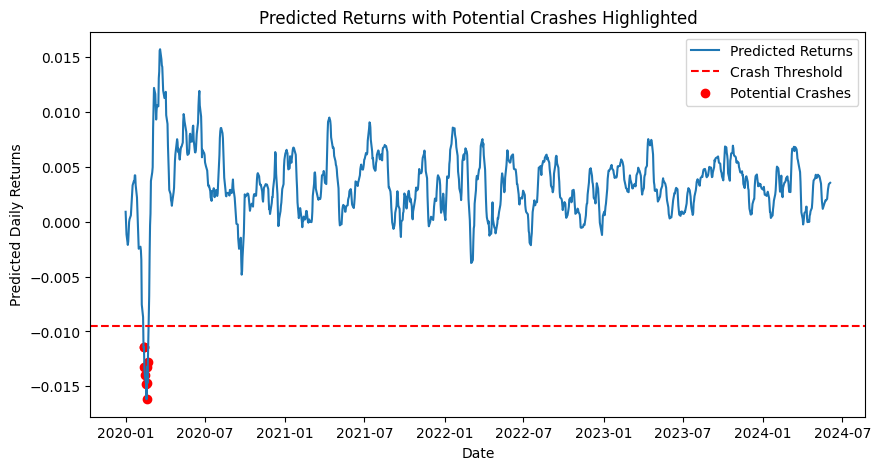

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have 'dates' as the corresponding dates for the data points in 'predicted_returns'
dates = pd.date_range(start='2020-01-01', periods=len(predicted_returns), freq='B')  # Business days

plt.figure(figsize=(10, 5))
plt.plot(dates, predicted_returns, label='Predicted Returns')
plt.axhline(y=crash_threshold, color='r', linestyle='--', label='Crash Threshold')
plt.scatter(dates[predicted_returns.flatten() < crash_threshold], predicted_returns[predicted_returns < crash_threshold], color='red', label='Potential Crashes')
plt.title('Predicted Returns with Potential Crashes Highlighted')
plt.xlabel('Date')
plt.ylabel('Predicted Daily Returns')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Load the historical data (assuming it's already loaded as `data`)
data = pd.read_csv('RELIANCE.NS_Historical_Data.csv', parse_dates=['Date'], index_col='Date')
adj_close_prices = data['Adj Close'].values

# Assume 'predicted_returns' and 'crash_threshold' are defined as before
predicted_crash_indices = np.where(predicted_returns < crash_threshold)[0]

# Calculate the returns for selling before the crash and buying on the crash day
if predicted_crash_indices.size > 0 and predicted_crash_indices[0] > 0:
    # Ensuring we have a previous day to sell
    sell_prices = adj_close_prices[predicted_crash_indices - 1]  # Prices a day before predicted crashes
    buy_prices = adj_close_prices[predicted_crash_indices]       # Prices on predicted crash days
    returns = (buy_prices - sell_prices) / sell_prices           # Negative values mean profit here

    # Sum of returns (profit if negative since we're selling high, buying low)
    total_return = np.sum(returns)
    print(f"Total Returns from Strategy: {total_return:.2%}")
    print(f"Individual Transaction Returns: {returns}")
else:
    print("No valid crash days predicted with available data.")


Total Returns from Strategy: 0.75%
Individual Transaction Returns: [ 0.01194605  0.01208051  0.00261851  0.00912403 -0.00628548 -0.00733967
  0.0248057  -0.01186976 -0.02759178]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load data
data = pd.read_csv('RELIANCE.NS_Historical_Data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Calculate additional features: Moving Averages
data['MA10'] = data['Adj Close'].rolling(window=10).mean()
data['MA50'] = data['Adj Close'].rolling(window=50).mean()

# Drop NA values that result from rolling averages
data = data.dropna()

# Prepare features and labels
features = data[['Adj Close', 'MA10', 'MA50']].values
labels = data['Adj Close'].shift(-1).values  # Shift labels to predict the next day

# Drop the last row from features to align with labels which will be NaN at the last index
features = features[:-1]  # Align features with the shifted labels
labels = labels[:-1]  # Drop last NaN value

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

# Reshape for LSTM [samples, time steps, features]
features_scaled = features_scaled.reshape((features_scaled.shape[0], 1, features_scaled.shape[1]))

# Define and compile the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(features_scaled.shape[1], features_scaled.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit model
model.fit(features_scaled, labels, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 4402915.0000 - val_loss: 8023230.5000
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4389261.5000 - val_loss: 8016032.0000
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4394870.5000 - val_loss: 7994726.0000
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4414686.0000 - val_loss: 7967635.0000
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4410614.0000 - val_loss: 7948326.0000
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4404099.0000 - val_loss: 7935082.0000
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4317399.5000 - val_loss: 7924402.0000
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4361404.5000 - val_loss: 7914897.5000
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4332231.5000 - val_loss: 7906093.5000
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4369365.0000 - val_loss: 7897740.0000
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

In [ ]:
# Assuming your model is defined and compiled as shown in previous steps
model.fit(features_scaled, labels, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3854956.7500 - val_loss: 7316352.5000
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3900687.2500 - val_loss: 7310332.0000
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3864560.2500 - val_loss: 7304362.5000
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3898956.0000 - val_loss: 7298387.0000
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3932953.0000 - val_loss: 7292363.5000
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3916471.5000 - val_loss: 7286383.0000
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3814369.0000 - val_loss: 7280458.0000
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3840021.7500 - val_loss: 7274492.0000
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3939080.2500 - val_loss: 7268453.5000
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3892483.7500 - val_loss: 7262488.5000
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Predict the stock prices using the model
predictions = model.predict(features_scaled)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [ ]:
# Flatten the predictions if necessary (common with output from Keras models)
predictions = predictions.flatten()

# Ensure predictions are properly aligned in time, if necessary
# Here we assume predictions directly correspond to the adjusted close prices


In [ ]:
def calculate_returns(data, predictions, stop_loss_threshold):
    # This function will implement your trading strategy
    # Make sure this function definition is included before you call it
    pass


In [ ]:
# Load and prepare your data and model (ensure this is done correctly as shown in previous steps)

# Train the model
model.fit(features_scaled, labels, epochs=50, batch_size=32, validation_split=0.2)

# Generate predictions
predictions = model.predict(features_scaled)
predictions = predictions.flatten()  # Flatten the predictions if coming from a model with one output

# Call your trading strategy with the predictions
final_capital, transaction_log = calculate_returns(data, predictions, stop_loss_threshold=0.05)
print(f"Final capital after following strategy: ${final_capital:.2f}")
print("Transaction log:", transaction_log)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3696602.5000 - val_loss: 7020339.0000
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3675693.5000 - val_loss: 7014483.0000
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3749999.0000 - val_loss: 7008635.5000
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3774893.5000 - val_loss: 7002777.5000
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3708042.0000 - val_loss: 6996927.0000
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3612866.2500 - val_loss: 6991124.5000
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3629707.5000 - val_loss: 6985310.0000
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3696000.5000 - val_loss: 6979459.5000
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3661326.5000 - val_loss: 6973646.0000
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3644582.5000 - val_loss: 6967807.0000
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
def calculate_returns(data, predictions, stop_loss_threshold):
    capital = 100000  # Initial capital
    shares = 0
    stop_loss_price = 0
    transactions = []

    for i in range(len(predictions) - 1):
        if shares == 0:  # Not currently holding shares
            # Buy if predicted price for next day is higher than today's price
            if predictions[i] > data['Adj Close'].iloc[i]:
                shares = capital / data['Adj Close'].iloc[i]
                capital = 0
                stop_loss_price = data['Adj Close'].iloc[i] * (1 - stop_loss_threshold)
                transactions.append(('buy', data.index[i], data['Adj Close'].iloc[i], shares))
        else:  # Currently holding shares
            # Check stop loss
            if data['Adj Close'].iloc[i] < stop_loss_price:
                capital = shares * data['Adj Close'].iloc[i]
                shares = 0
                transactions.append(('sell', data.index[i], data['Adj Close'].iloc[i], capital))
            # Sell if predicted price for next day is lower than today's price
            elif predictions[i] < data['Adj Close'].iloc[i]:
                capital = shares * data['Adj Close'].iloc[i]
                shares = 0
                transactions.append(('sell', data.index[i], data['Adj Close'].iloc[i], capital))

    if shares > 0:
        capital = shares * data['Adj Close'].iloc[-1]  # Final sell at last price
        transactions.append(('sell', data.index[-1], data['Adj Close'].iloc[-1], capital))

    return capital, transactions


In [ ]:
# Assuming `predictions` is generated from your model and aligned correctly

# Call your trading strategy with the predictions
final_capital, transaction_log = calculate_returns(data, predictions, stop_loss_threshold=0.05)
print(f"Final capital after following strategy: ${final_capital:.2f}")
print("Transaction log:", transaction_log)


Final capital after following strategy: $100000.00
Transaction log: []


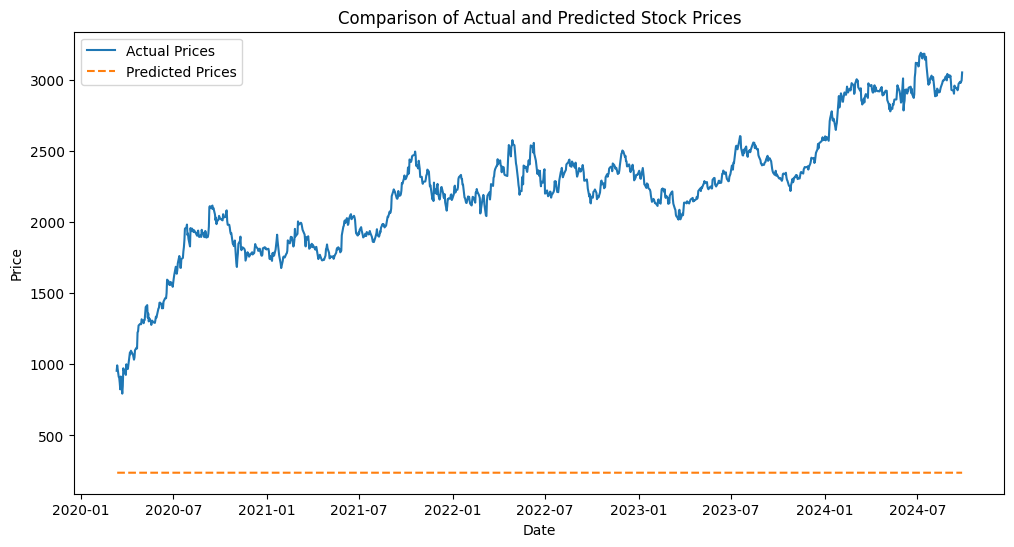

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' has the correct dates and 'predictions' align with these dates
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Adj Close'], label='Actual Prices')
plt.plot(data.index[-len(predictions):], predictions, label='Predicted Prices', linestyle='--')
plt.title('Comparison of Actual and Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


<ipython-input-4-59606697967f>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Adj Close'].fillna(method='ffill', inplace=True)  # Forward fill any missing values
<ipython-input-4-59606697967f>:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Adj Close'].fillna(method='ffill', inplace=True)  # Forward fill any missing values
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an 

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - loss: 0.0844
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0030
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0015
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0012
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0012
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0012
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0010
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0011
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0010
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 9.2149e-04
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


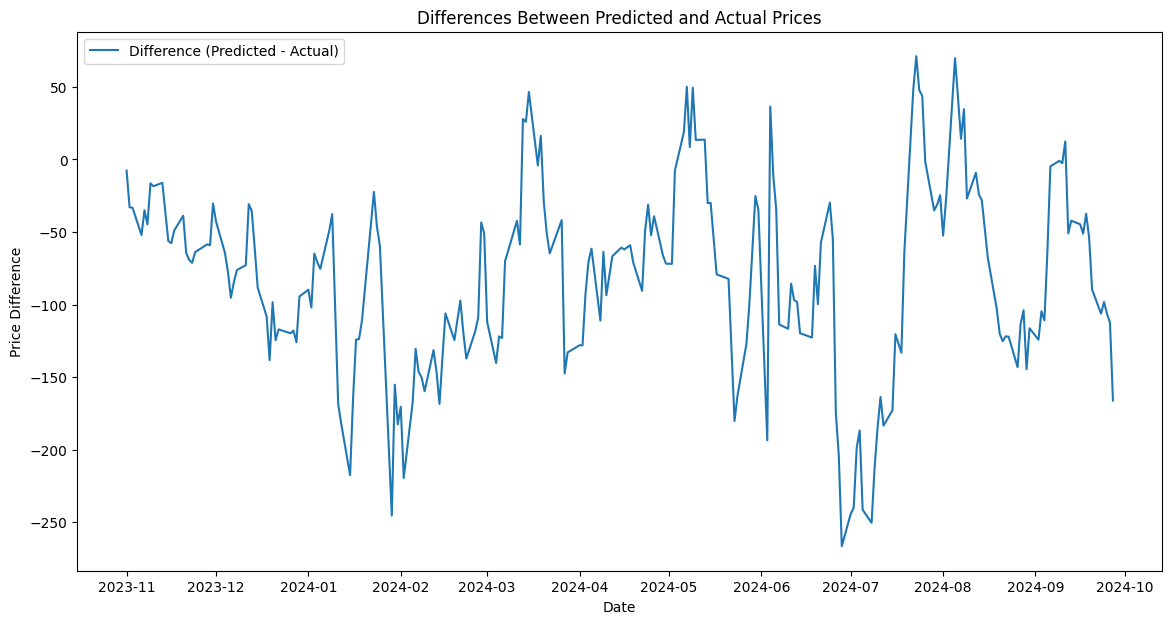

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load data
data = pd.read_csv('RELIANCE.NS_Historical_Data.csv', parse_dates=['Date'], index_col='Date')

# Assuming you have prepared features and labels previously
# For simplicity, let's assume you are predicting based on 'Adj Close' prices only
data['Adj Close'].fillna(method='ffill', inplace=True)  # Forward fill any missing values

# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Prepare the data for LSTM: create sequences of 60 days of prices to predict the next day price
window_length = 60
X, y = [], []
for i in range(window_length, len(scaled_features)):
    X.append(scaled_features[i-window_length:i, 0])
    y.append(scaled_features[i, 0])
X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predicting the prices using the test set
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Inverse transform to get actual price scale

# Calculate the differences
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
differences = predicted_prices.flatten() - actual_prices.flatten()

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(differences):], differences, label='Difference (Predicted - Actual)')
plt.title('Differences Between Predicted and Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.legend()
plt.show()
